# Reversal Learning

### Analysis of data obtained from reversal_exp1_final.psyexp
### Differences between near and far transfers

## Experimental specs:
#### n = 18
#### 3 stimulus sets --  8 fractal stimuli per set -- 2 runs per set 
#### 200 trials per run (160 Stim -- 40 Baseline)
#### 1200 total trials per subject

#### Current script only looks at the second run in each of the three stimulus sets

In [6]:
%matplotlib inline
import os
from os.path import join
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pylab import *

### General statistics on accuracy and reaction time performance for near versus far transfers

#### Run 2, 4, 6 only

In [13]:
subs = ['RL2_001', 'RL2_003', 'RL2_005', 'RL2_006', 'RL2_008', 'RL2_009', 'RL2_011',
        'RL2_012', 'RL2_014', 'RL2_015', 'RL2_016', 'RL2_017', 'RL2_018']          
       
# Removed subs RL2_002, RL2_004, RL2_007, RL2_010, RL2_013 for failure to meet 60% correct criteria.

near_acc = []
near_rt = []
far_acc = []
far_rt = []


# Get the CSV file for each participant
for curr_sub in subs:
    curr_dir = '/home/data/madlab/data/mri/rev_lrn/pilot_data/behavioral/data/'
    dir_file = curr_dir + '{0}.csv'.format(curr_sub)
   
    # Open CVS file using Pandas
    sub_file = pd.read_csv(dir_file)
    # Obtain all rows in trial_acc with 0 or 1 only -- no nonresponse trials
    # Creates new array sans gaps in csv file
    sub_rows = sub_file.query('trial_acc == 0 or trial_acc == 1')

    # Grab only the second run in each stimulus set (transfer type comparison)
    # Start at beginning of second run
    for run_num in range(200, 1200, 400):        
        # Convert dataframes into Numpy arrays for second runs only 2 -- 4 -- 6(200, 600, 1000)
        rev_run = sub_rows[run_num : run_num + 200]  
        # Compute the set number (0,1,2)
        i = int(run_num / 400)
        # Isolate columns for both response maps (run 1 & run 2)
        resp_map1 = rev_run['resp_map1_{0}'.format(i)].values[-1]
        resp_map2 = rev_run['resp_map2_{0}'.format(i)].values[-1]
        #print resp_map1
        #print resp_map2     

        # Replace comma-less blanks with comma blanks
        if type(resp_map1) == str and not "," in resp_map1: 
            resp_map1 = resp_map1.replace(" ", ", ")
        if type(resp_map2) == str and not "," in resp_map2: 
            resp_map2 = resp_map2.replace(" ", ", ")

        # Convert strings to lists
        resp_map1 = np.array(eval(resp_map1))
        resp_map2 = np.array(eval(resp_map2))

        # Grab rows in which absolute value of curr_stim (indicated by index location) resp_map2
        # less resp_map1 is either 2 or 1 --> indicating far or near transfer, respectively
        # Values in these arrays indicate which stimulus is a near or far transfer
        near_transfers = np.where((abs(resp_map2 - resp_map1) == 1))
        far_transfers = np.where((abs(resp_map2 - resp_map1) == 2))      

        #print 'Near'
        #print near_transfers
        #print 'Far'
        #print far_transfers

        # Identifies trials with only near transfer stimuli
        near_query = rev_run.query('stim_type == {0} or stim_type == {1} or stim_type == {2} or stim_type == {3}'.format
                                       (*near_transfers[0]))
        # Grabs near transfer accuracy
        near_trans_acc = near_query['trial_acc'].values
        #print near_transfers
        #print 'Near Transfer Acc'
        #print near_trans_acc
        # Grabs near transfer reaction time
        near_trans_rt = near_query['trial_resp.rt'].values
        #print 'Near Transfer RT'
        #print far_trans_rt
        # Grabs near transfer response keys (for use in dealing with nonresponse in RT analysis)
        near_trans_respkeys = near_query['trial_resp.keys'].values 
        far_query = rev_run.query('stim_type == {0} or stim_type == {1} or stim_type == {2} or stim_type == {3}'.format
                                       (*far_transfers[0]))
        far_trans_acc = far_query['trial_acc'].values
        #print far_transfers
        #print 'Far Transfer Acc'
        #print far_trans_acc
        far_trans_rt = far_query['trial_resp.rt'].values
        #print 'Far Transfer RT'
        #print far_trans_rt
        far_trans_respkeys = far_query['trial_resp.keys'].values
        
        # If RT value is empty (nonresponse), replace with 1 (full possible length on response window)
        near_trans_rt[np.where(near_trans_respkeys == "None")[0]] = 1
        far_trans_rt[np.where(far_trans_respkeys == "None")[0]] = 1
        
        # Append all acc and rt values to global arrays
        near_acc.extend(near_trans_acc)
        near_rt.extend(near_trans_rt)
        far_acc.extend(far_trans_acc)
        far_rt.extend(far_trans_rt) 

#Each array length should be 240*13 = 3120
#240 near/far for 13 subs
print len(near_acc)
print len(far_acc)        
        
     
print "ACCURACY"
print ''
print "Near Mean"            
print np.average(near_acc)
print "Near STD"            
print np.std(near_acc)
print "Far Mean" 
print np.average(far_acc)
print "Far STD" 
print np.std(far_acc)

print ''

# Accuracy Analysis
# Independent samples t-test
t_acc, p_acc = stats.ttest_rel(near_acc, far_acc)
# Formula for standard pooled variance
#spe_acc = abs(1/t_acc * (np.average(near_acc) - np.average(far_acc)))

print "Related Sample t-Test"
print t_acc
print "p-Value"
print p_acc

print '\n'

print "REACTION TIME"
print ''
print "Near Mean" 
print np.average(near_rt)
print "Near STD" 
print np.std(near_rt)
print "Far Mean"
print np.average(far_rt)
print "Far STD" 
print np.std(far_rt)

print ''

# Reaction Time Analysis
t_rt, p_rt = stats.ttest_rel(near_rt, far_rt)
#spe_rt = abs(1/t_rt * (np.average(near_rt) - np.average(far_rt)))

print "Related Sample t-Test"
print t_rt
print "p-Value"
print p_rt

3120
3120
ACCURACY

Near Mean
0.764743589744
Near STD
0.424158969833
Far Mean
0.732371794872
Far STD
0.442722654659

Related Sample t-Test
3.23285953457
p-Value
0.00123834655532


REACTION TIME

Near Mean
0.240275982409
Near STD
0.188090830883
Far Mean
0.24728611983
Far STD
0.197767916523

Related Sample t-Test
-1.57040632638
p-Value
0.116422045334


### Reversal Learning Accuracy Barplot

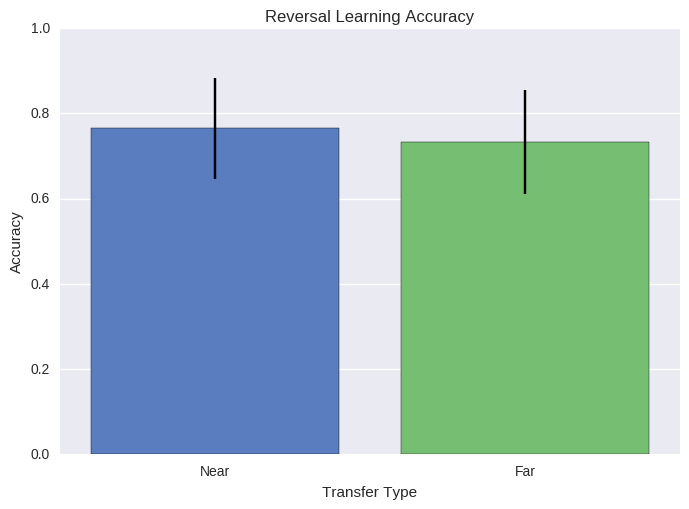

In [4]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt

N = 2
conditions = ['Near', 'Far']
acc_means_allsubjs = [np.average(near_acc), np.average(far_acc)]
acc_sem_allsubjs = [np.std(near_acc)/(np.sqrt(len(subs))), np.std(far_acc)/(np.sqrt(len(subs)))]

ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = sns.barplot(ind, acc_means_allsubjs, yerr = acc_sem_allsubjs, ecolor = 'black')

ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylim(0,1)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Transfer Type")
ax.set_title("Reversal Learning Accuracy")


plt.show()

### Reversal Learning Reaction Time Barplot

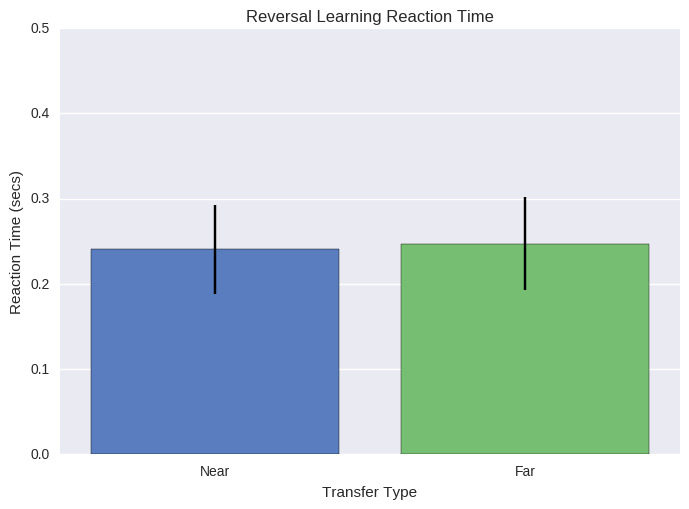

In [5]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt

N = 2
conditions = ['Near', 'Far']
rt_means_allsubjs = [np.average(near_rt), np.average(far_rt)]
rt_sem_allsubjs = [np.std(near_rt)/(np.sqrt(len(subs))), np.std(far_rt)/(np.sqrt(len(subs)))]

ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = sns.barplot(ind, rt_means_allsubjs, yerr = rt_sem_allsubjs, ecolor = 'black')

ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylim(0,0.5)
ax.set_ylabel("Reaction Time (secs)")
ax.set_xlabel("Transfer Type")
ax.set_title("Reversal Learning Reaction Time")


plt.show()

# Learning Curve Analysis Comparing Near vs. Far Transfers

### Compares the combined learning curve across Run 2 for near transfers (4 stims) and far transfers (4 stims)

In [5]:
%matplotlib inline
import os
from os.path import join
import numpy as np
import pandas as pd
from glob import glob
from scipy.integrate import simps, trapz
import matplotlib.pyplot as plt
from pylab import *

### New accuracy files for both transfer types are necessary

In [6]:
################################################################
### NOTE !! ONLY NEED TO RUN THIS ONCE FOR EACH PARTICIPANT ####
################################################################
# This cell will take the log file and isolate the correct/incorrect performance for each 
# stimulus type 1-8 and then save a .csv file in each participant's directory

subs = ['RL2_001', 'RL2_003', 'RL2_005', 'RL2_006', 'RL2_014', 'RL2_015', 'RL2_016',
        'RL2_008', 'RL2_009', 'RL2_011', 'RL2_012', 'RL2_017', 'RL2_018']
          
       
# Get the CSV file for each participant
for curr_sub in subs:
    curr_dir = '/home/data/madlab/data/mri/rev_lrn/pilot_data/behavioral/data/'
    dir_file = curr_dir + '{0}.csv'.format(curr_sub)
   
    # Open CVS file using Pandas
    sub_file = pd.read_csv(dir_file)
    # Obtain all rows in trial_acc with 0 or 1 only -- no nonresponse trials
    # Creates new array sans gaps in csv file
    sub_rows = sub_file.query('trial_acc == 0 or trial_acc == 1')

    # Grab only the second run in each stimulus set (transfer type comparison)
    # Start at beginning of second run
    for run_num in range(200, 1200, 400):        
        # Convert dataframes into Numpy arrays for second runs only (200, 600, 1000)
        rev_run = sub_rows[run_num : run_num + 200]  
        # Compute the set number (0,1,2)
        i = int(run_num/400)
        # Isolate columns for both response maps (run 1 & run 2)
        resp_map1 = rev_run['resp_map1_{0}'.format(i)].values[-1]
        resp_map2 = rev_run['resp_map2_{0}'.format(i)].values[-1]
        #print resp_map1
        #print resp_map2     

        # Replace comma-less blanks with comma blanks
        if type(resp_map1) == str and not "," in resp_map1: 
            resp_map1 = resp_map1.replace(" ", ", ")
        if type(resp_map2) == str and not "," in resp_map2: 
            resp_map2 = resp_map2.replace(" ", ", ")

        # Convert strings to lists
        resp_map1 = np.array(eval(resp_map1))
        resp_map2 = np.array(eval(resp_map2))

        # Grab rows in which absolute value of curr_stim (indicated by index location) resp_map2
        # less resp_map1 is either 2 or 1 --> indicating far or near transfer, respectively
        # Values in these arrays indicate which stimulus is a near or far transfer
        near_transfers = np.where((abs(resp_map2 - resp_map1) == 1))
        far_transfers = np.where((abs(resp_map2 - resp_map1) == 2)) 
        
        # Identifies trials with only near transfer stimuli
        near_query = rev_run.query('stim_type == {0} or stim_type == {1} or stim_type == {2} or stim_type == {3}'.format
                                       (*near_transfers[0]))
        # Grabs near transfer accuracy
        near_trans_acc = near_query['trial_acc'].values
        #print near_transfers
        #print 'Near Transfer Acc'
        #print near_trans_acc
        
        far_query = rev_run.query('stim_type == {0} or stim_type == {1} or stim_type == {2} or stim_type == {3}'.format
                                       (*far_transfers[0]))
        far_trans_acc = far_query['trial_acc'].values
        #print far_transfers
        #print 'Far Transfer Acc'
        #print far_trans_acc

        # If the output directory does not exist
        if not os.path.exists(join('/home/data/madlab/data/mri/rev_lrn/pilot_data/behavioral/learning_analysis/transfers', 
                                   '{0}'.format(curr_sub))):
            # Create it
            os.makedirs(join('/home/data/madlab/data/mri/rev_lrn/pilot_data/behavioral/learning_analysis/transfers', 
                             '{0}'.format(curr_sub)))
        # Save the current set's near transfer trial accuracy    
        np.savetxt(join('/home/data/madlab/data/mri/rev_lrn/pilot_data/behavioral/learning_analysis/transfers', 
                        '{0}/set{1}_near_acc.txt'.format(curr_sub, i+1)), 
                   near_trans_acc, delimiter = '\t', fmt = '%.0f')
        # Save the current set's far transfer trial accuracy    
        np.savetxt(join('/home/data/madlab/data/mri/rev_lrn/pilot_data/behavioral/learning_analysis/transfers', 
                        '{0}/set{1}_far_acc.txt'.format(curr_sub, i+1)), 
                   far_trans_acc, delimiter = '\t', fmt = '%.0f')


# IMPORTANT
# After running this cell you MUST run the wmazebl_plotmemstr.m file in matlab.
# This will calculate the relevant pmode, p95, p05 data and save the text files that are required
# for the below cell

### Creation of the learning curve figures for near and far of each stimulus set 

Subject RL2_001
Stimulus Set 1


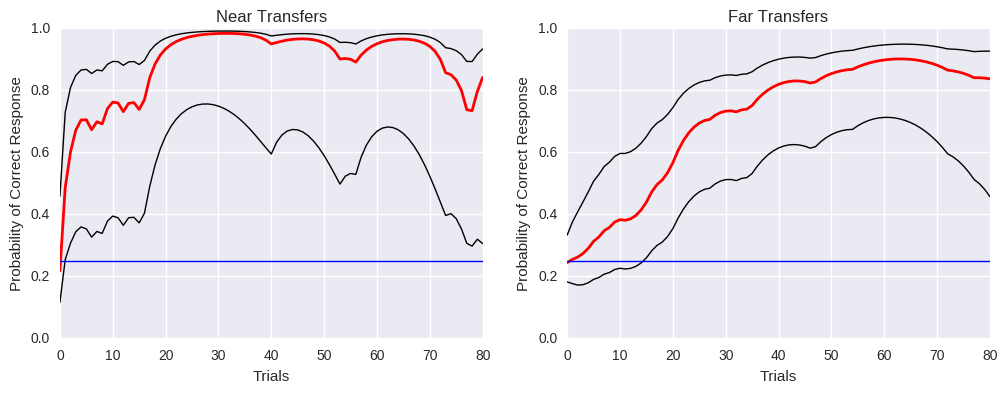

Subject RL2_001
Stimulus Set 2


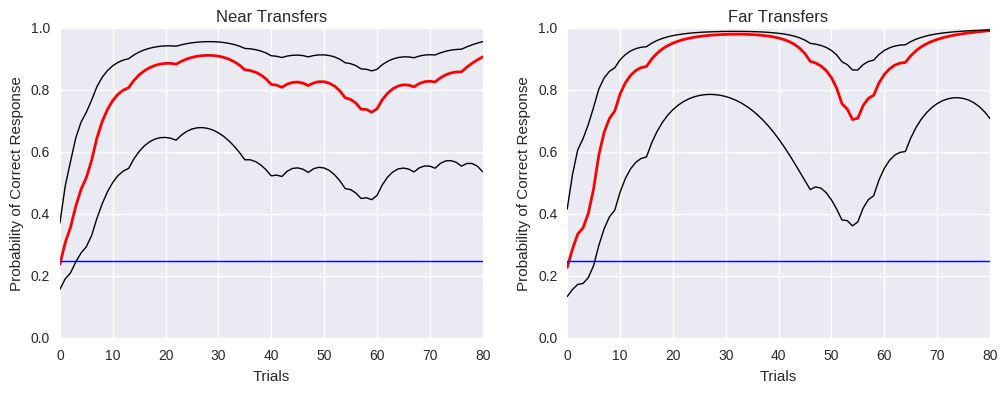

Subject RL2_001
Stimulus Set 3


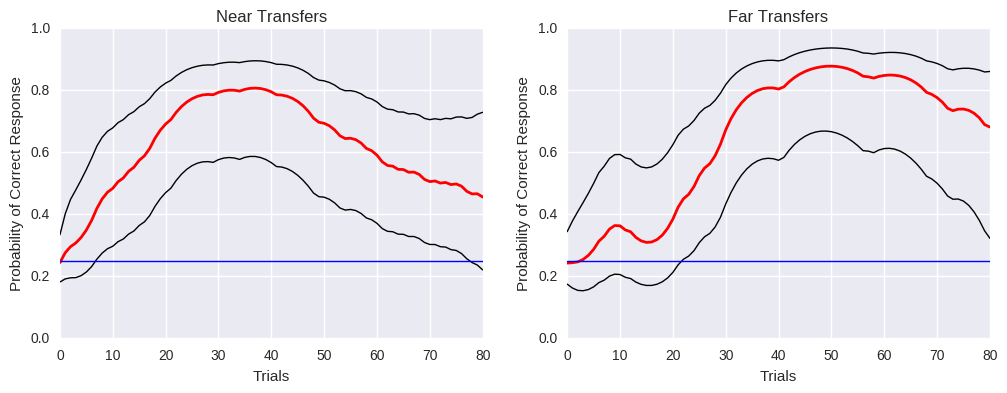

Subject RL2_003
Stimulus Set 1


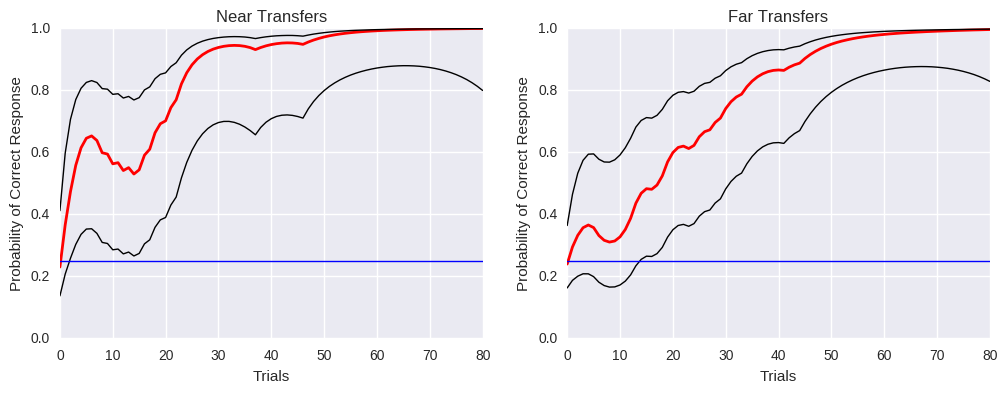

Subject RL2_003
Stimulus Set 2


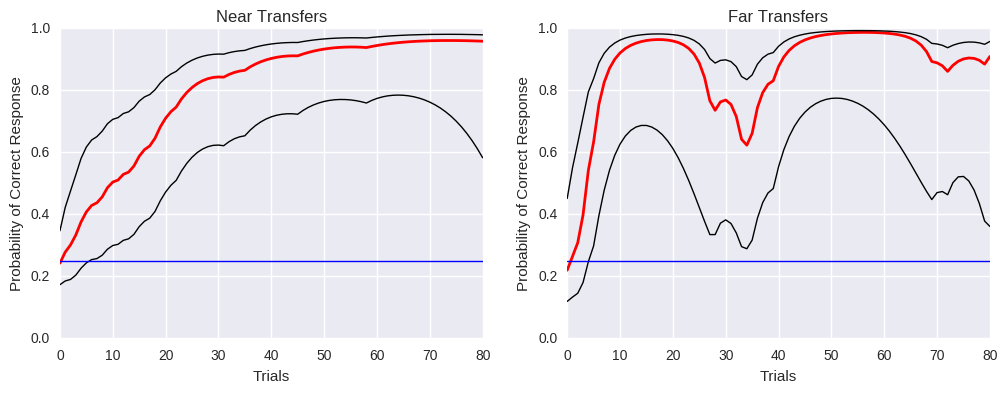

Subject RL2_003
Stimulus Set 3


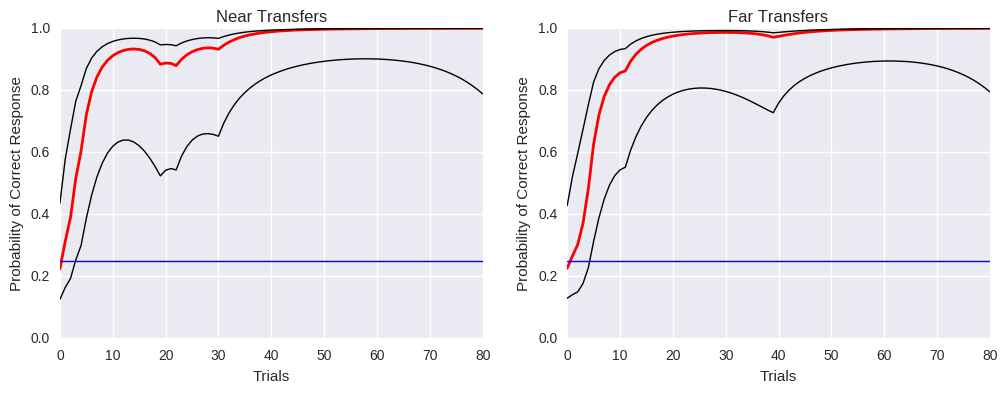

Subject RL2_005
Stimulus Set 1


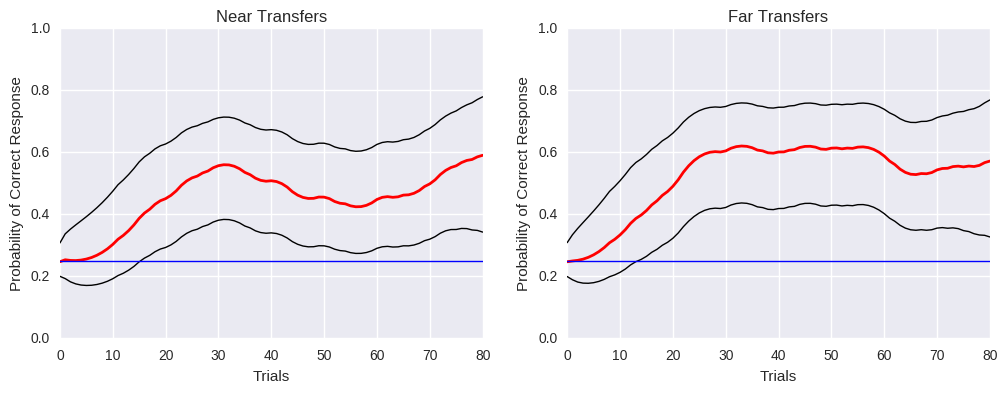

Subject RL2_005
Stimulus Set 2


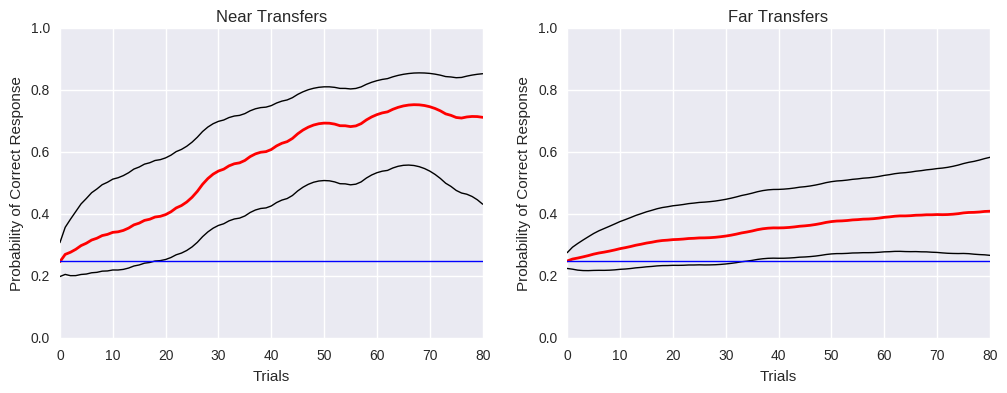

Subject RL2_005
Stimulus Set 3


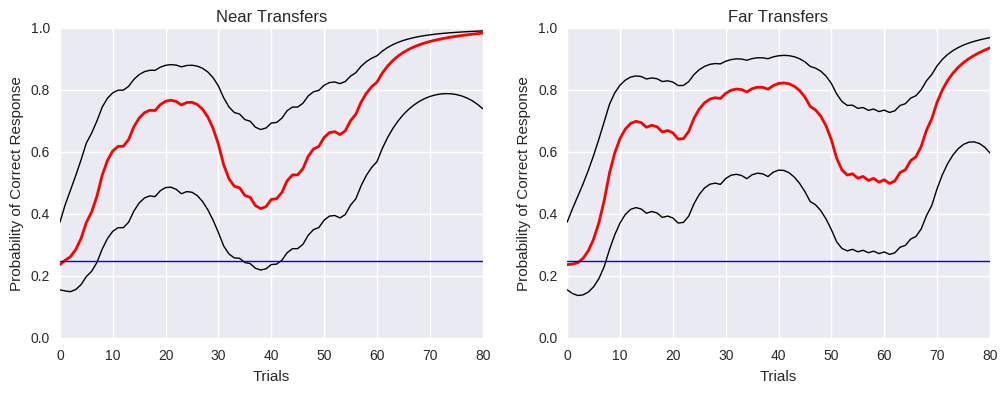

Subject RL2_006
Stimulus Set 1


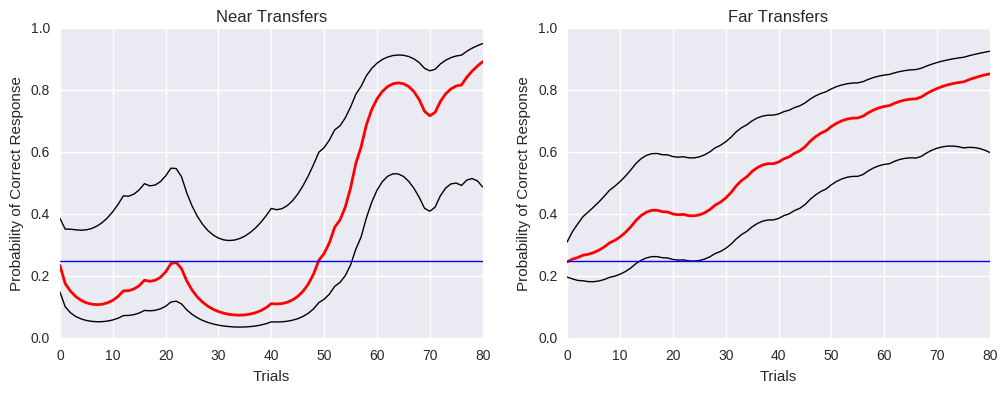

Subject RL2_006
Stimulus Set 2


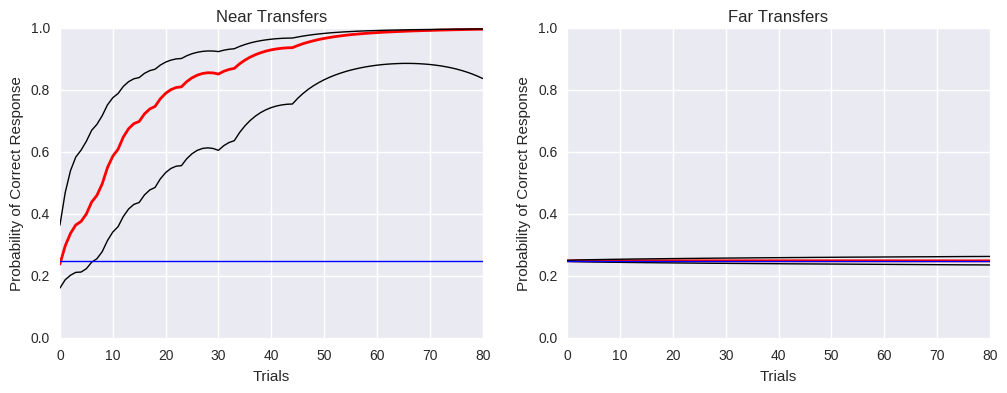

Subject RL2_006
Stimulus Set 3


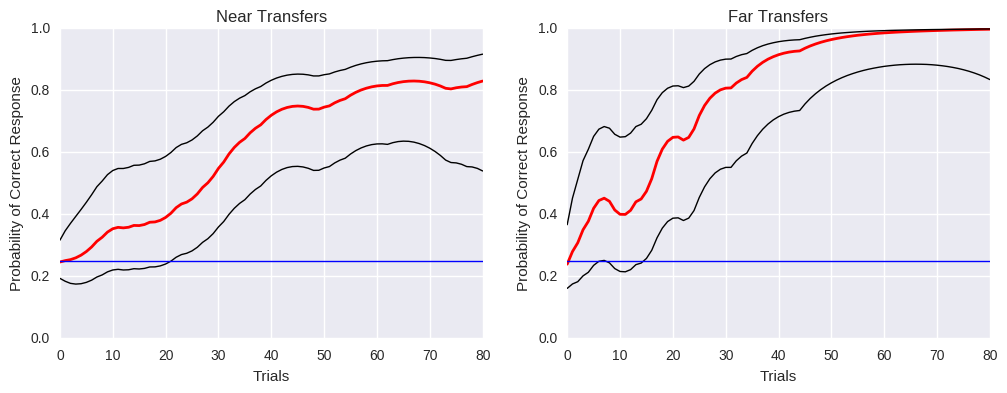

Subject RL2_014
Stimulus Set 1


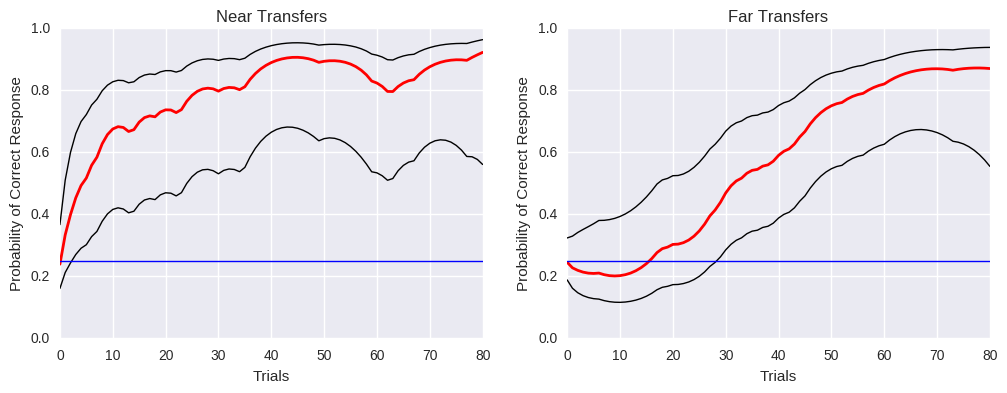

Subject RL2_014
Stimulus Set 2


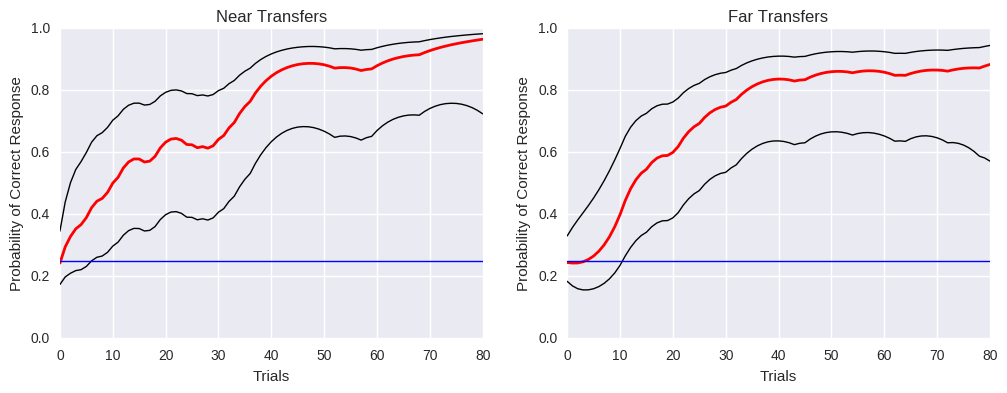

Subject RL2_014
Stimulus Set 3


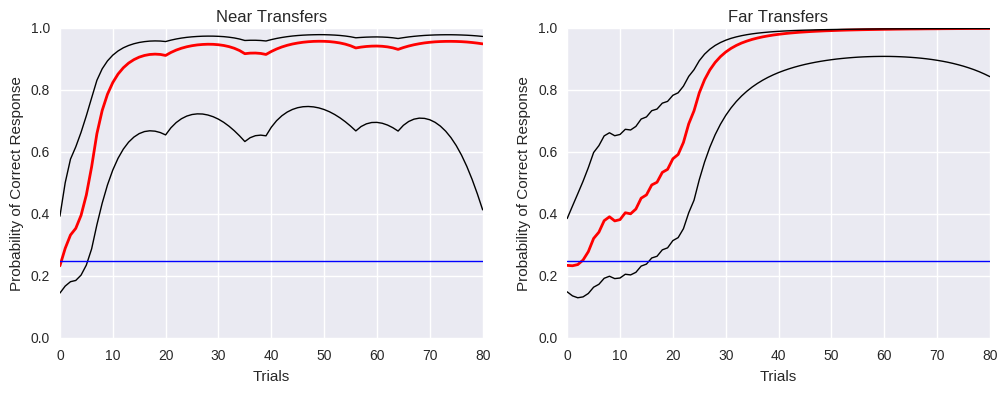

Subject RL2_015
Stimulus Set 1


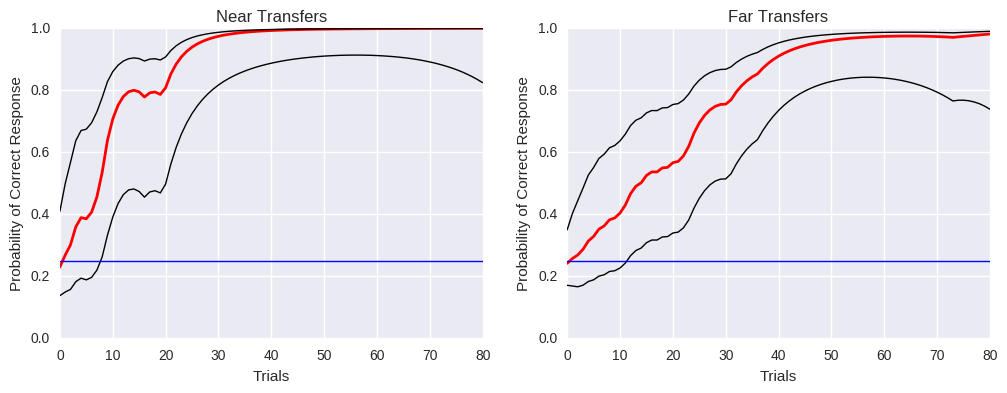

Subject RL2_015
Stimulus Set 2


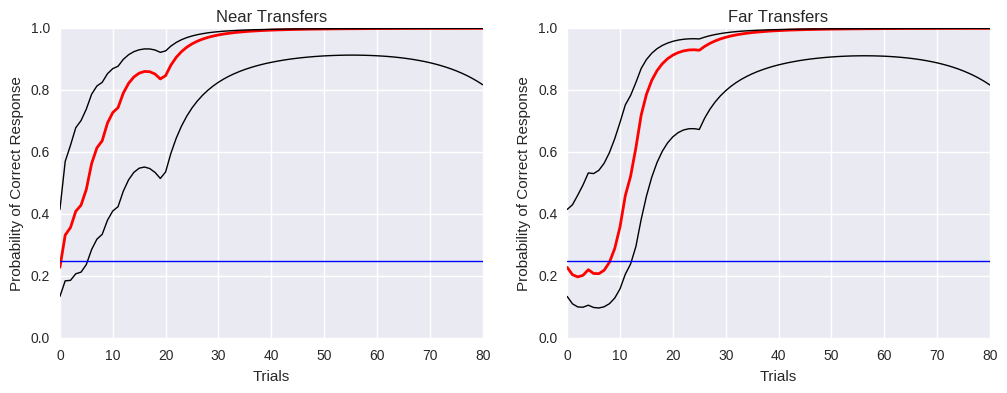

Subject RL2_015
Stimulus Set 3


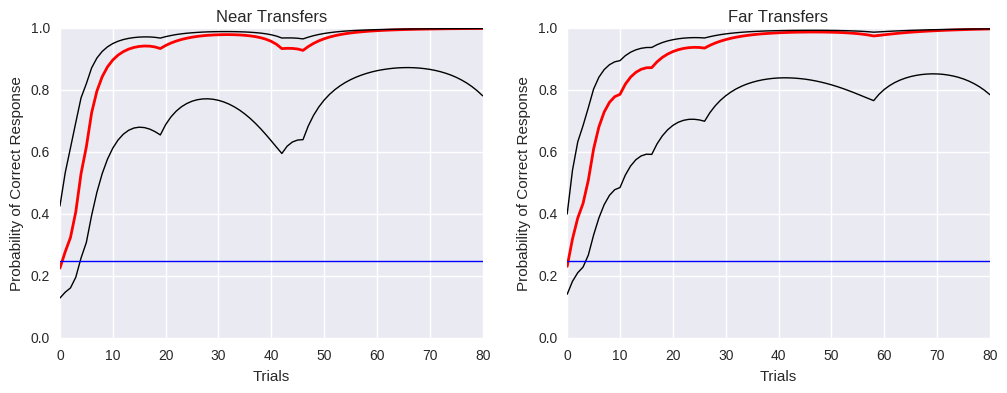

Subject RL2_016
Stimulus Set 1


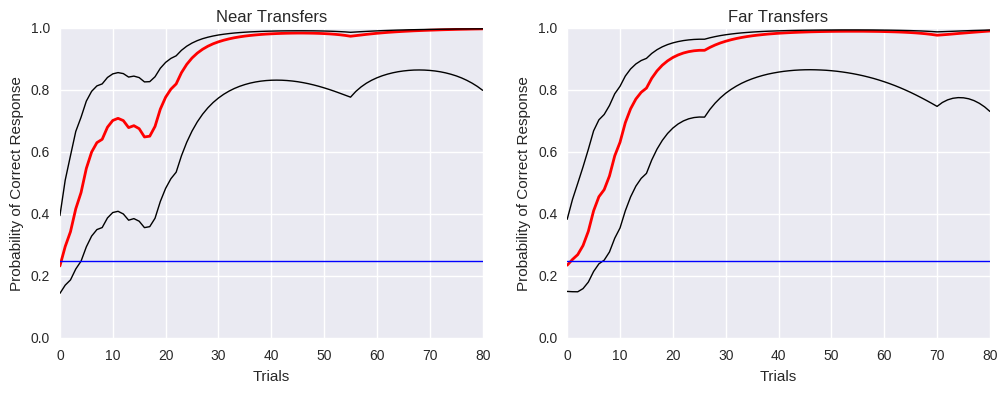

Subject RL2_016
Stimulus Set 2


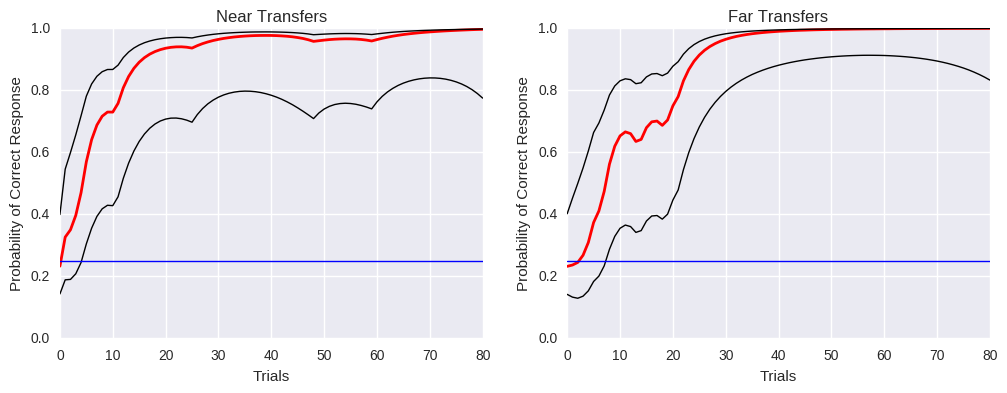

Subject RL2_016
Stimulus Set 3


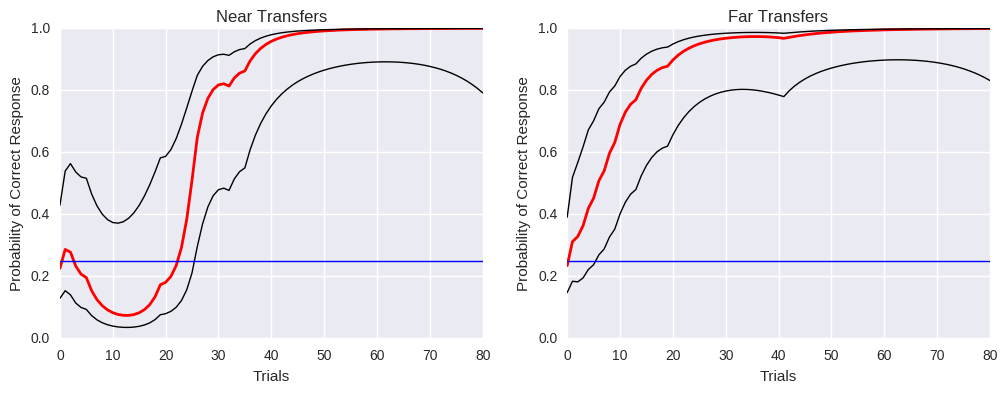

Subject RL2_008
Stimulus Set 1


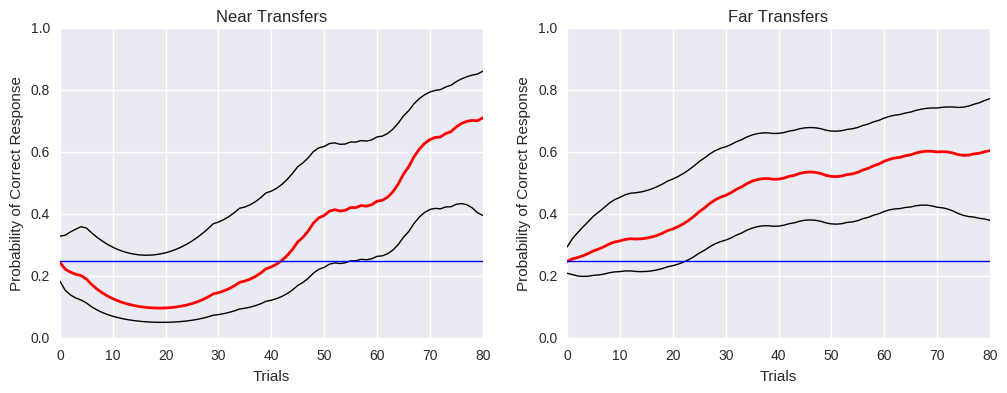

Subject RL2_008
Stimulus Set 2


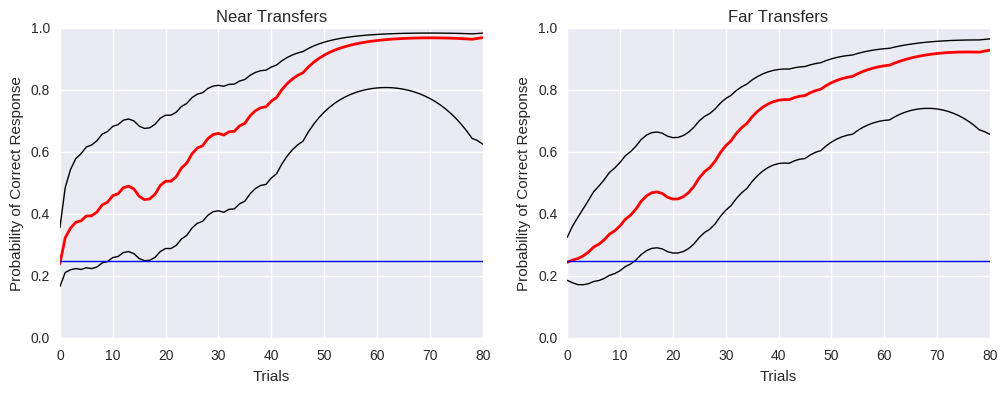

Subject RL2_008
Stimulus Set 3


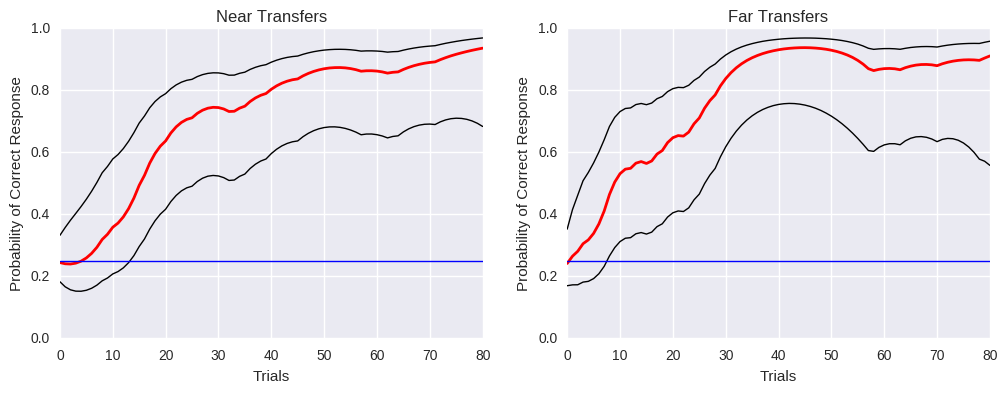

Subject RL2_009
Stimulus Set 1


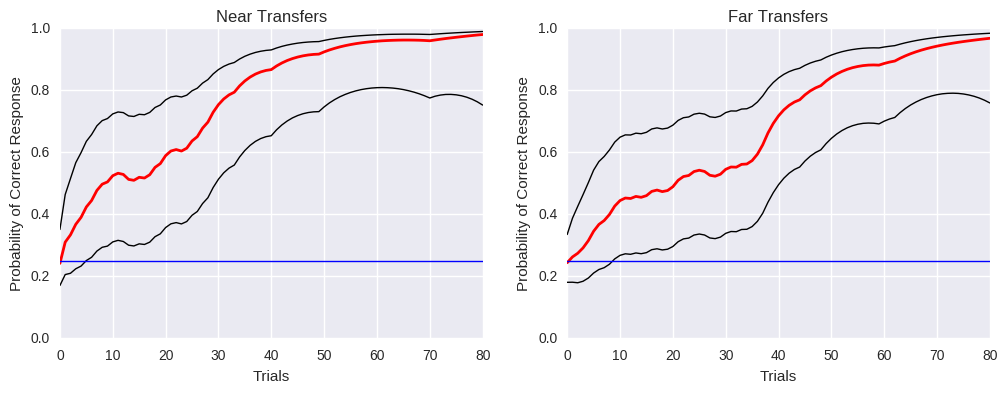

Subject RL2_009
Stimulus Set 2


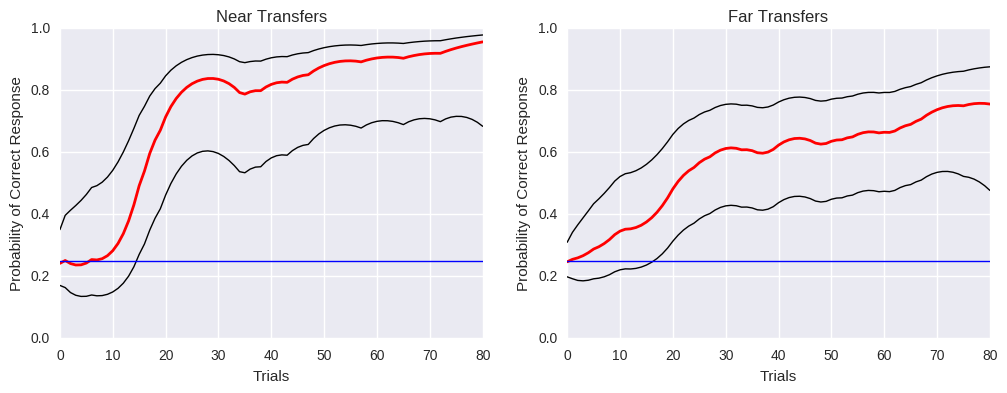

Subject RL2_009
Stimulus Set 3


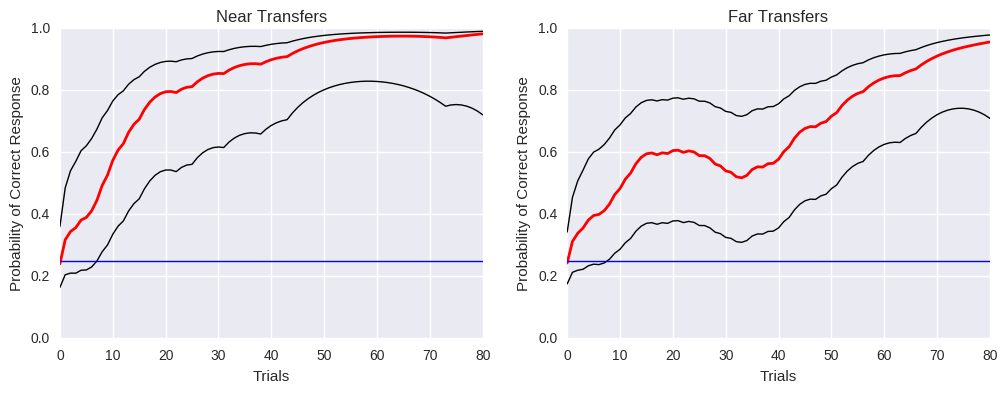

Subject RL2_011
Stimulus Set 1


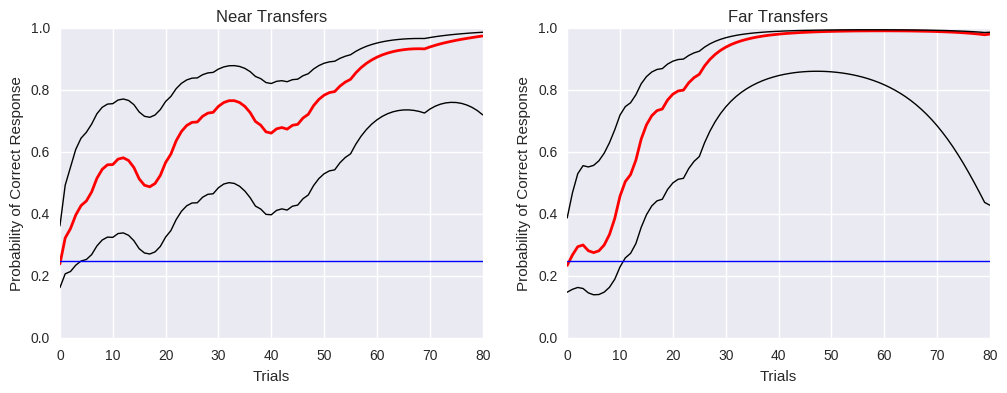

Subject RL2_011
Stimulus Set 2


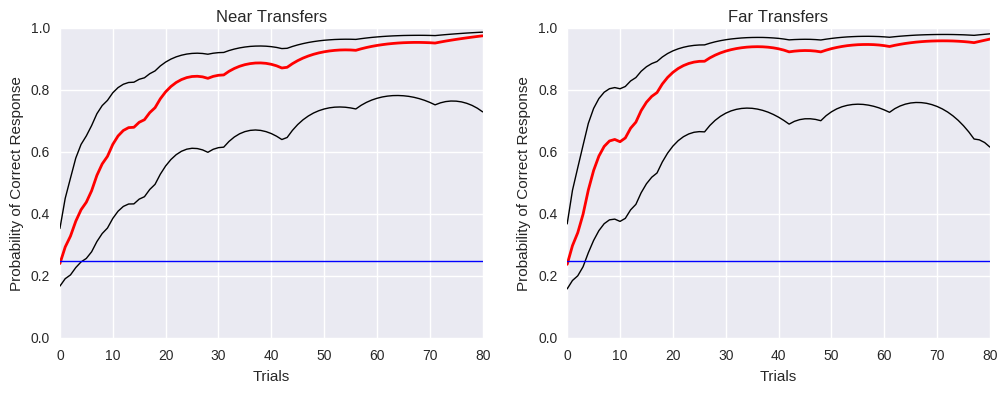

Subject RL2_011
Stimulus Set 3


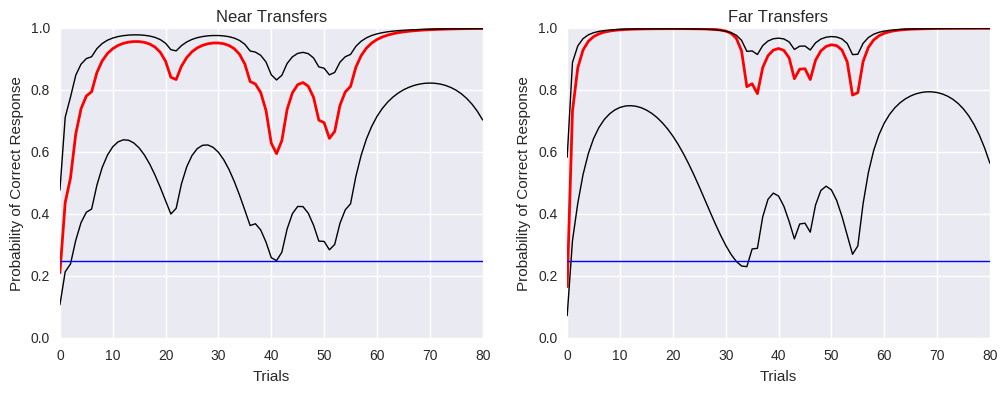

Subject RL2_012
Stimulus Set 1


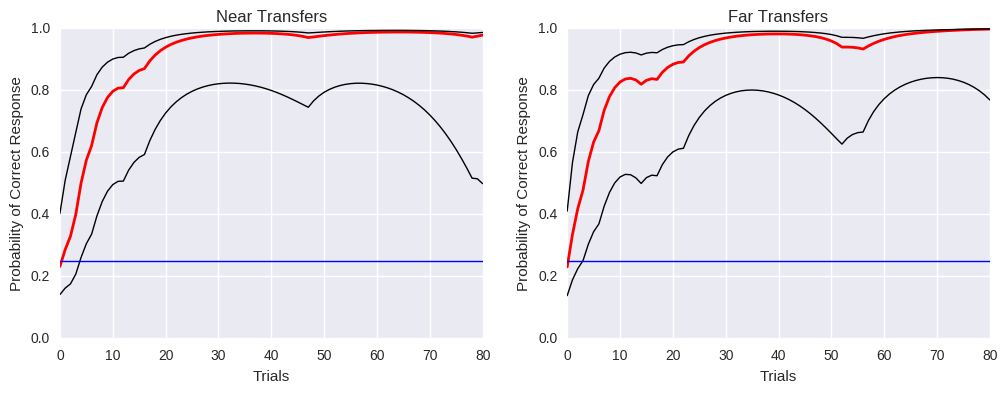

Subject RL2_012
Stimulus Set 2


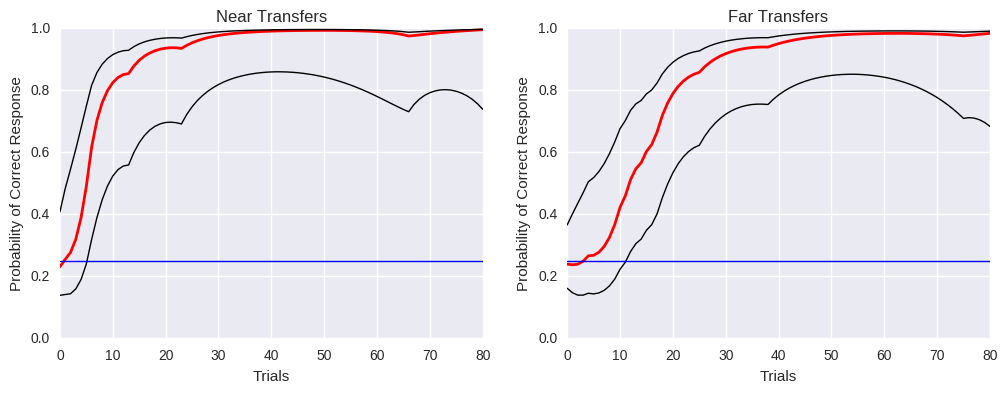

Subject RL2_012
Stimulus Set 3


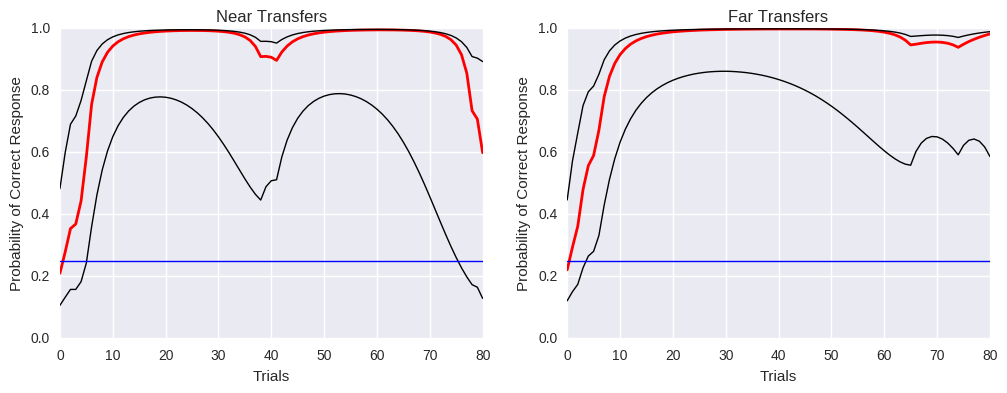

Subject RL2_017
Stimulus Set 1


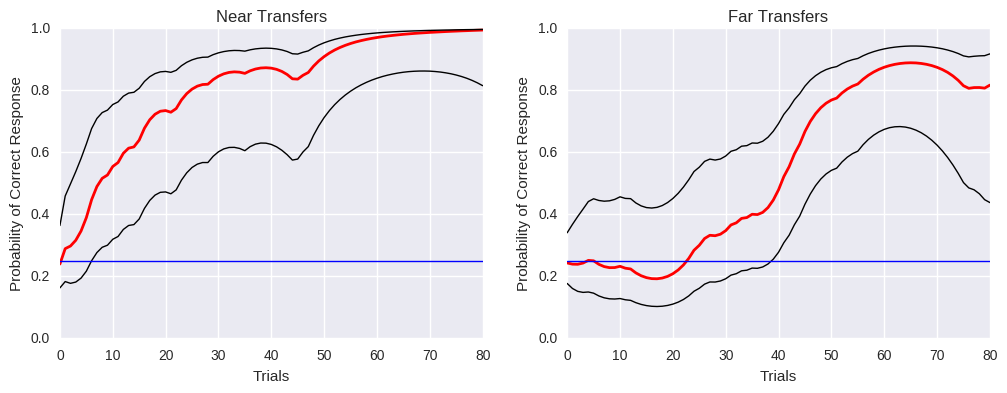

Subject RL2_017
Stimulus Set 2


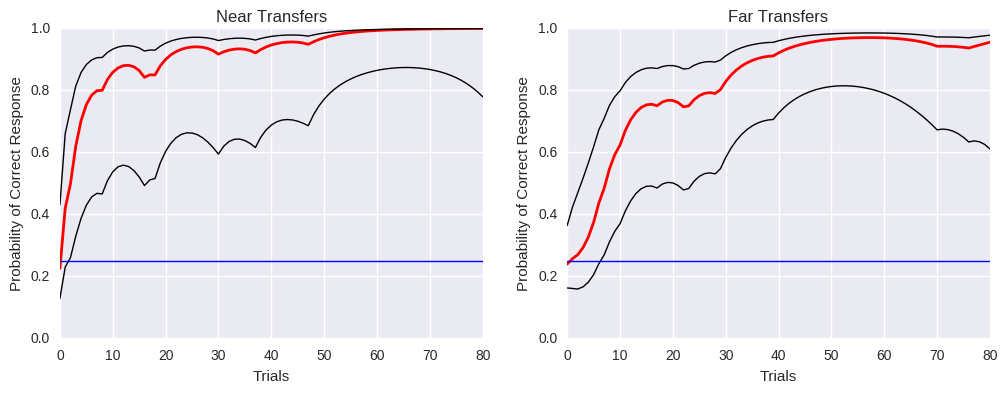

Subject RL2_017
Stimulus Set 3


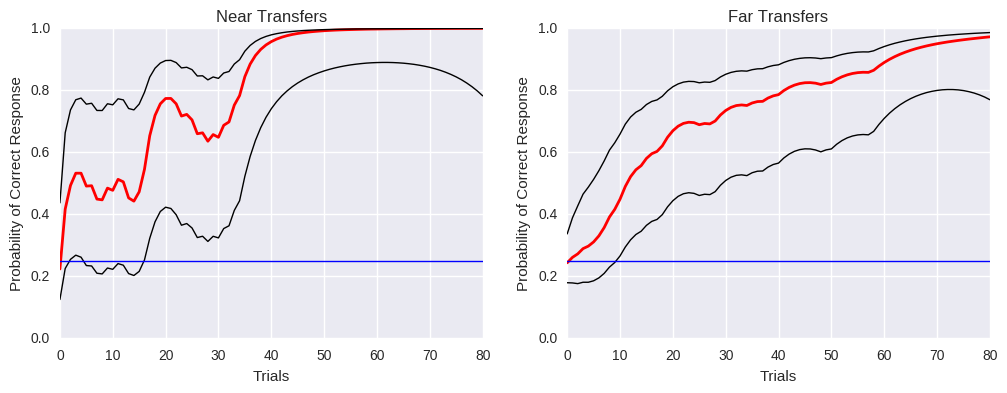

Subject RL2_018
Stimulus Set 1


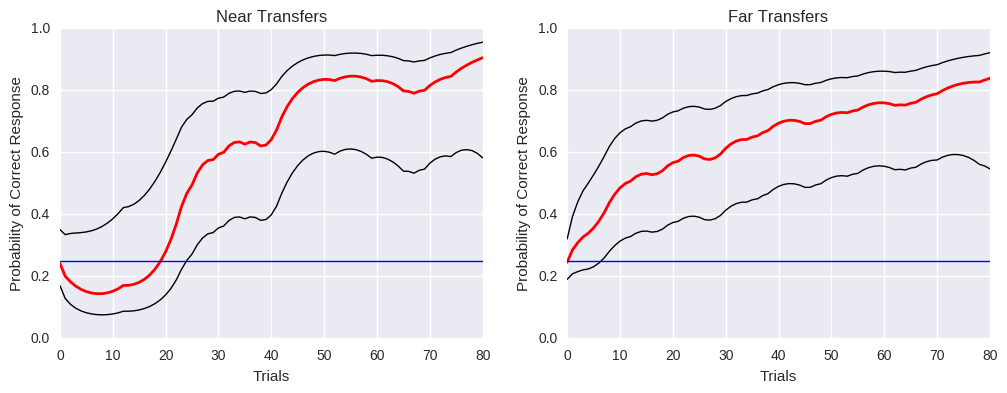

Subject RL2_018
Stimulus Set 2


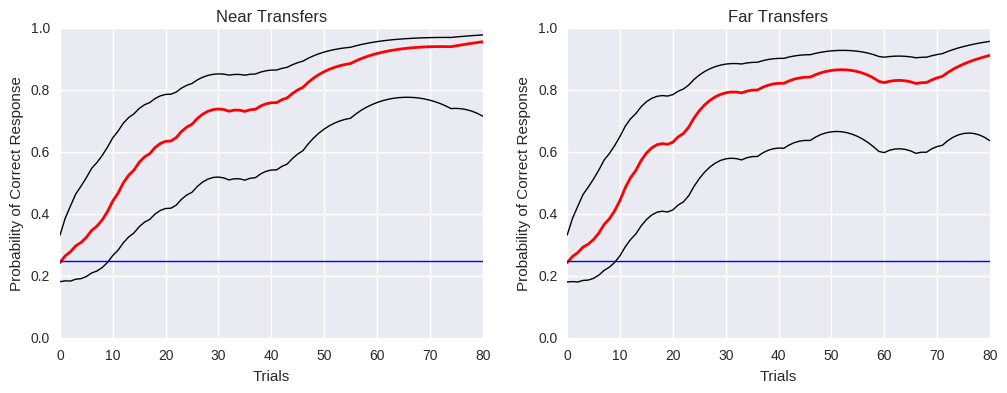

Subject RL2_018
Stimulus Set 3


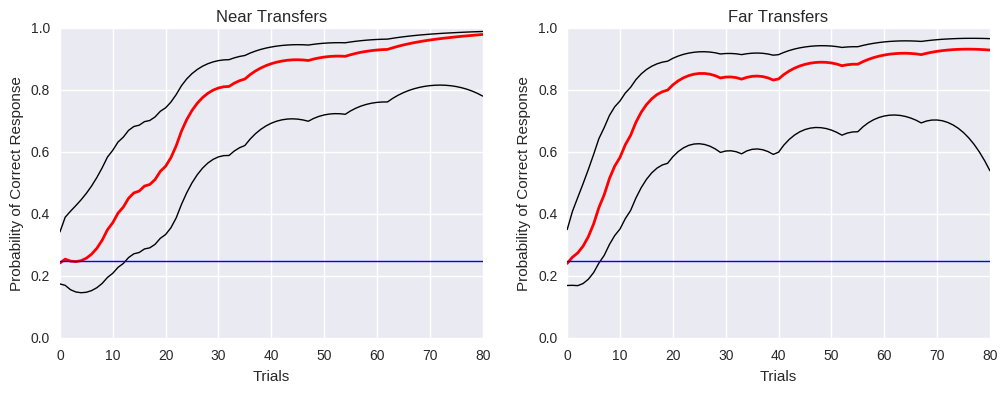

In [16]:
# The script in this cell reads in the pmode, p95 and p05 for each fract image [1-8] and
# plots them along with chance performance 50% correct across all trials
# Red line = probability of being correct on any given trial (x-axis)
# Black lines = 95% confidence interval around the probability correct curve
# Blue line = chance performance

# Learning is typically defined as the trial when the lower bound of the 95% confidence interval
# crosses and stays above chance performance

subs = ['RL2_001', 'RL2_003', 'RL2_005', 'RL2_006', 'RL2_014', 'RL2_015', 'RL2_016',
        'RL2_008', 'RL2_009', 'RL2_011', 'RL2_012', 'RL2_017', 'RL2_018']
          
       
#subs = ['RL2_001']


sets = ['1', '2', '3']

# For each sub, get all accuracy text files produced in the matlab script
for sub in subs:
    curr_dir = '/home/data/madlab/data/mri/rev_lrn/pilot_data/behavioral/learning_analysis/transfers/{0}/'.format(sub)
    # For the current stimulus set
    for curr_set in sets:

        # Files obtained from MatLab script
        # Near Transfers
        near_pmode_filename = curr_dir + 'set{0}_near_pmode.txt'.format(curr_set)
        near_p95_filename = curr_dir + 'set{0}_near_p95.txt'.format(curr_set) 
        near_p05_filename = curr_dir + 'set{0}_near_p05.txt'.format(curr_set)
        near_pmode = np.genfromtxt(near_pmode_filename)
        near_p05 = np.genfromtxt(near_p95_filename)
        near_p95 = np.genfromtxt(near_p05_filename)
        near_prime_pmode = np.gradient(near_pmode)
        near_prime_pmode_ten = near_prime_pmode * 10        
        # Far Transfers
        far_pmode_filename = curr_dir + 'set{0}_far_pmode.txt'.format(curr_set)
        far_p95_filename = curr_dir + 'set{0}_far_p95.txt'.format(curr_set) 
        far_p05_filename = curr_dir + 'set{0}_far_p05.txt'.format(curr_set)
        far_pmode = np.genfromtxt(far_pmode_filename)
        far_p05 = np.genfromtxt(far_p95_filename)
        far_p95 = np.genfromtxt(far_p05_filename)
        far_prime_pmode = np.gradient(far_pmode)
        far_prime_pmode_ten = far_prime_pmode * 10
        
        x = range(len(near_pmode))
        chance = np.ones(len(x)) * 0.25

        fig, (ax0, ax1) = plt.subplots(ncols = 2, figsize = (12, 4))
        ax0.plot(x, near_pmode, 'r', linewidth = 2)
        ax0.plot(x, near_p95, 'k', linewidth = 1)
        ax0.plot(x, near_p05, 'k', linewidth = 1)
        ax0.plot(x, chance, 'b', linewidth = 1)
        ax1.plot(x, far_pmode, 'r', linewidth = 2)
        ax1.plot(x, far_p95, 'k', linewidth = 1)
        ax1.plot(x, far_p05, 'k', linewidth = 1)
        ax1.plot(x, chance, 'b', linewidth = 1)

        ax0.set_ylim(0,1)
        ax0.set_xlabel('Trials')
        ax0.set_ylabel('Probability of Correct Response')
        ax0.set_title('Near Transfers')
        ax1.set_ylim(0,1)
        ax1.set_xlabel('Trials')
        ax1.set_ylabel('Probability of Correct Response')
        ax1.set_title('Far Transfers')
        print 'Subject ' + sub
        print 'Stimulus Set ' + curr_set
        plt.show()

## Area Under the Curve Analysis -- Near vs. Far Boxplot

#### Information only relevant for Runs 2, 4, & 6 (reversal runs)

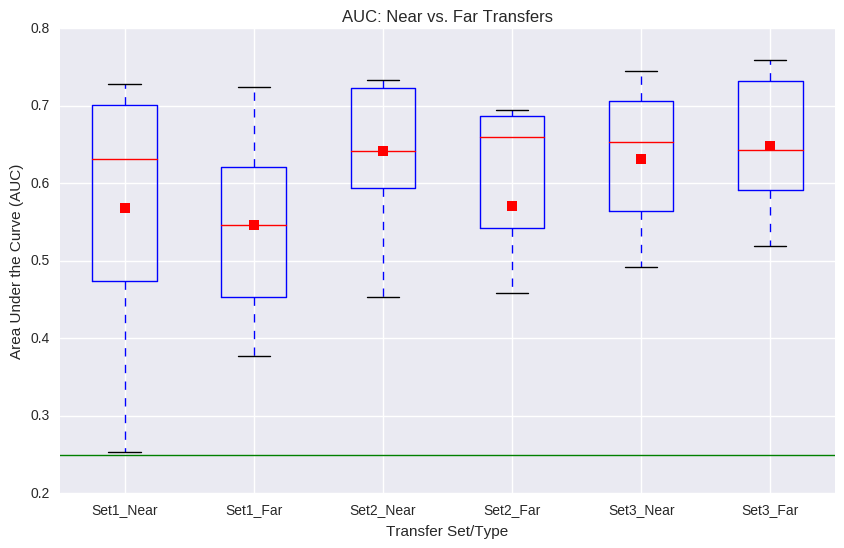

In [15]:
# The code below reading in the pmode for each stimulus type and each subject and calculates the
# Area Under the Curve (AUC). The AUC is calculated using the scipy trapz integration function with
# a dx step size of 0.01

subs = ['RL2_001', 'RL2_003', 'RL2_005', 'RL2_006', 'RL2_008', 'RL2_009', 'RL2_011',
        'RL2_012', 'RL2_014', 'RL2_015', 'RL2_016', 'RL2_017', 'RL2_018']

sets = ['1', '2', '3']
# Dictionary to contain all AUC information for each set and transfer
auc_all_trans = {'set1_near_trans_AUC': [], 'set1_far_trans_AUC': [],
                 'set2_near_trans_AUC': [], 'set2_far_trans_AUC': [],
                 'set3_near_trans_AUC': [], 'set3_far_trans_AUC': []}

# For the current sub, define pathways to pmode files for each set and transfer
for sub in subs:
    for curr_set in sets:
        curr_dir = '/home/data/madlab/data/mri/rev_lrn/pilot_data/behavioral/learning_analysis/transfers/{0}/'.format(sub)
        near_pmode_filename = curr_dir + 'set{0}_near_pmode.txt'.format(curr_set)
        far_pmode_filename = curr_dir + 'set{0}_far_pmode.txt'.format(curr_set)

        # Load near and far p_mode files
        near_pmode = np.genfromtxt(near_pmode_filename)
        far_pmode = np.genfromtxt(far_pmode_filename)
        
        # Use the trapz function to produce AUC for each set
        auc_near = trapz(near_pmode, dx = 0.01)
        auc_far = trapz(far_pmode, dx = 0.01)

        # Append each set AUC to all transfer dictionary
        auc_all_trans['set{0}_near_trans_AUC'.format(curr_set)].append(auc_near)
        auc_all_trans['set{0}_far_trans_AUC'.format(curr_set)].append(auc_far)

# This cell plots the AUC data determined above as a box plot.
# Green line = AUC for chance performance
# Red square = Mean AUC
# Red line = Median AUC
# Initial learning (Runs 1, 3, & 5 exclusively) 

auc_plot_data1 = []
auc_plot_data1.append(auc_all_trans['set1_near_trans_AUC'])
auc_plot_data1.append(auc_all_trans['set1_far_trans_AUC'])
auc_plot_data1.append(auc_all_trans['set2_near_trans_AUC'])
auc_plot_data1.append(auc_all_trans['set2_far_trans_AUC'])
auc_plot_data1.append(auc_all_trans['set3_near_trans_AUC'])
auc_plot_data1.append(auc_all_trans['set3_far_trans_AUC'])

labels = ['Set1_Near', 'Set1_Far', 'Set2_Near', 'Set2_Far', 'Set3_Near', 'Set3_Far']
x = range(len(labels) + 2)
chance = np.ones(len(x)) * 0.25

fig, ax0 = plt.subplots(figsize = (10,6))
bp = plt.boxplot(auc_plot_data1, labels = labels, showmeans = True)
#ax0.set_ylim(0,1)
ax0.set_ylabel("Area Under the Curve (AUC)")
ax0.set_xlabel('Transfer Set/Type')
ax0.set_title("AUC: Near vs. Far Transfers")
ax0.plot(x, chance, 'g', linewidth = 1)
plt.show()

# The data represent the area under the curve for the learning curve analysis fconducted above